In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import missingno as msno
from collections import Counter

In [2]:
data = pd.read_csv("newdata.csv", engine='python')
data.head()

,Unnamed: 0,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,...,read,text,tran,work,comp,comp_bed_16,tv,talk_mob,talk_phon,fam_tv
0,0,NaN,3.0,30.0,59.294132,181.602831,107.0,False,False,True,...,2.0,2.0,0.0,4.0,True,False,4.0,2.0,1.0,3.0
1,1,NaN,9.0,26.0,NaN,NaN,85.0,False,False,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
2,2,NaN,3.0,24.0,NaN,NaN,NaN,False,False,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,3.0
3,3,False,NaN,22.0,49.812426,160.224186,NaN,False,False,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
4,4,False,8.0,31.0,62.270030,191.703227,132.0,True,False,False,...,4.0,0.0,0.0,2.0,True,True,5.0,0.0,0.0,5.0


In [3]:
dictionary = pd.read_csv("./dataset/synthetic_data_dictionary.csv", engine='python')
dictionary.head()

,Variable Name,Variable ALSPAC Name,Variable Description,Variable Type,Administered to,Age of child at administration,ALSPAC Measure,ALSPAC Responses,Processing Details,Reference Document
0,agg_score,f596,Aggression score of partnership,Discrete,Mother,Aged 8 months,Derived by ALSPAC. See Processing Details,NaN,Aggression score was determined by three quest...,NaN
1,alon_week,ccs1006,Average time child spent per day doing things ...,Ordinal,Child,Aged 198 months,"""How much time on average do you spend each da...",Not at all,"The category ""Not at all"" was collapsed into t...",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 1 hour,NaN,NaN
3,,,NaN,NaN,NaN,NaN,NaN,1-2 hours,NaN,NaN
4,,,NaN,NaN,NaN,NaN,NaN,3 or more hours,NaN,NaN


In [4]:
columns = list(data.head(0))
print(columns)
print(columns[0])

['Unnamed: 0', 'comp_bed_9', 'mat_dep', 'mat_age', 'weight_16', 'height_16', 'iq', 'comp_noint_bed_16', 'comp_int_bed_16', 'talk_phon_wend', 'text_wend', 'talk_mob_wend', 'comp_wend', 'musi_wend', 'read_wend', 'work_wend', 'alon_wend', 'draw_wend', 'play_wend', 'tv_wend', 'out_win_wend', 'out_sum_wend', 'tran_wend', 'talk_phon_week', 'text_week', 'talk_mob_week', 'comp_week', 'musi_week', 'read_week', 'work_week', 'alon_week', 'draw_week', 'play_week', 'tv_week', 'out_win_week', 'out_sum_week', 'tran_week', 'pat_pres_10', 'pat_pres_8', 'pat_pres', 'num_home', 'mat_anx_1', 'mat_anx_18m', 'mat_anx_8m', 'agg_score', 'emot_cruel', 'phys_cruel', 'mat_anx_0m', 'pat_ses', 'mat_ses', 'pat_edu', 'mat_edu', 'parity', 'dep_band_15', 'dep_band_13', 'dep_band_10', 'dep_band_07', 'anx_band_15', 'anx_band_13', 'anx_band_10', 'anx_band_07', 'exercise', 'child_bull', 'phone_14_wend', 'phone_14_week', 'musi_13', 'tv_bed_9', 'own_mob', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thought

In [5]:


rows = dictionary[(dictionary["Age of child at administration"] == "Aged 198 months")]
rows2 = dictionary[(dictionary["Age of child at administration"] == "Aged around 17.5 years")]
rows3 = dictionary[(dictionary["Age of child at administration"] == "Aged around 15.5 years")]

columns_to_keep_names = list(rows['Variable Name'].append(rows2['Variable Name']).append(rows3['Variable Name']))

print(columns_to_keep_names)



['alon_week', 'alon_wend', 'child_bull', 'comp_house', 'comp_int_bed_16', 'comp_noint_bed_16', 'comp_week', 'comp_wend', 'draw_week', 'draw_wend', 'exercise', 'musi_week', 'musi_wend', 'out_sum_week', 'out_sum_wend', 'out_win_week', 'out_win_wend', 'play_week', 'play_wend', 'read_week', 'read_wend', 'talk_mob_week', 'talk_mob_wend', 'talk_phon_week', 'talk_phon_wend', 'text_wend', 'tran_week', 'tran_wend', 'tv_week', 'tv_wend', 'work_week', 'work_wend', 'dep_score', 'dep_thoughts', 'has_dep_diag', 'panic_score', 'prim_diag', 'secd_diag', 'anx_band_15', 'dep_band_15', 'height_16', 'weight_16']


In [6]:
df = pd.DataFrame(data)
for i in df.columns:
    if (i in columns_to_keep_names):
        print(i, "keep")
    else: df.drop(i, inplace = True, axis = 1)


weight_16 keep
height_16 keep
comp_noint_bed_16 keep
comp_int_bed_16 keep
talk_phon_wend keep
text_wend keep
talk_mob_wend keep
comp_wend keep
musi_wend keep
read_wend keep
work_wend keep
alon_wend keep
draw_wend keep
play_wend keep
tv_wend keep
out_win_wend keep
out_sum_wend keep
tran_wend keep
talk_phon_week keep
talk_mob_week keep
comp_week keep
musi_week keep
read_week keep
work_week keep
alon_week keep
draw_week keep
play_week keep
tv_week keep
out_win_week keep
out_sum_week keep
tran_week keep
dep_band_15 keep
anx_band_15 keep
exercise keep
child_bull keep
has_dep_diag keep
secd_diag keep
prim_diag keep
panic_score keep
dep_thoughts keep
dep_score keep
comp_house keep


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13734 entries, 0 to 13733
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13734 non-null  int64  
 1   comp_bed_9         8174 non-null   object 
 2   mat_dep            11145 non-null  float64
 3   mat_age            13326 non-null  float64
 4   weight_16          5351 non-null   float64
 5   height_16          5364 non-null   float64
 6   iq                 7288 non-null   float64
 7   comp_noint_bed_16  13734 non-null  bool   
 8   comp_int_bed_16    13734 non-null  bool   
 9   talk_phon_wend     4850 non-null   object 
 10  text_wend          4841 non-null   float64
 11  talk_mob_wend      4834 non-null   float64
 12  comp_wend          4839 non-null   float64
 13  musi_wend          4831 non-null   object 
 14  read_wend          4834 non-null   float64
 15  work_wend          4833 non-null   float64
 16  alon_wend          485

## TO DO
+ type screening 
+ outliers
+ black swans 
+ worst cases
+ imbalanced samples 

Outliers: https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
https://statisticsbyjim.com/basics/remove-outliers/
https://cxl.com/blog/outliers/


A black swan is an unpredictable event that is beyond what is normally expected of a situation and has potentially severe consequences. Black swan events are characterized by their extreme rarity, severe impact, and the widespread insistence they were obvious in hindsight.

Imbalanced datasets: https://datascience.foundation/sciencewhitepaper/understanding-imbalanced-datasets-and-techniques-for-handling-them
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html
https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

Worst case analysis: https://proceedings.neurips.cc/paper/2020/hash/d34a281acc62c6bec66425f0ad6dd645-Abstract.html
Not sure if we need it at all, probably not

### Outliers

Height and weight distribution

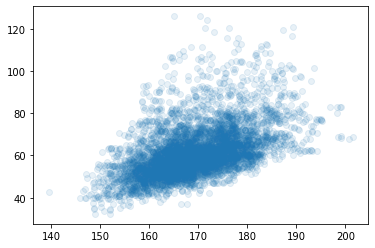

In [8]:
x = data.height_16
y = data.weight_16

plt.scatter(x, y, alpha=0.1)
plt.show()

Boxplots for all non-categorical variables

Text(0.5, 0, 'Sample')

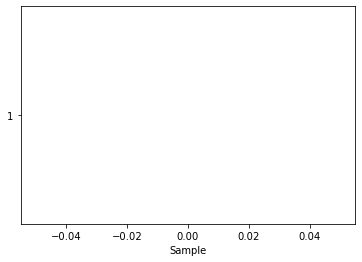

In [9]:
plt.boxplot(data.height_16, vert=False)
plt.xlabel('Sample')

Z-scores: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

In [10]:
def detect_outliers_zscore(xs):
    outliers = []
    thres = 3
    mean = np.mean(xs)
    std = np.std(xs)
    # print(mean, std)
    for i in xs:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [11]:
weight_outliers = detect_outliers_zscore(data.weight_16)
print("Outliers from Z-scores method: ", weight_outliers)

Outliers from Z-scores method:  [106.912736610394, 108.647814770842, 112.24711907142598, 110.675244693617, 104.737369332756, 108.09939402285801, 99.47306111438179, 104.38093422021099, 101.68273099917299, 99.2419369092074, 104.993764250504, 103.564232306512, 105.57617218496401, 106.516786672599, 111.66027188786501, 118.770974445603, 107.804654950301, 104.150239996927, 99.99448371763441, 112.76290452972601, 111.37944130156099, 107.17580565791799, 104.73258405940001, 113.563648773647, 100.455213336368, 102.315488080777, 116.82441561596902, 105.501614226415, 100.98172721989701, 103.520171797934, 101.362847179534, 108.535012000427, 109.457015431589, 104.177905336283, 99.8247605028558, 101.471240384867, 105.79478443720501, 104.984332518791, 101.580674841762, 106.342999132539, 102.705305370059, 104.30424258178199, 101.11576469785, 100.272339147922, 100.004841144597, 106.007876150786, 97.9078574092869, 106.551411965512, 98.14630872248242, 100.928057754711, 102.767338984242, 100.89053638078899,

In [12]:
height_outliers = detect_outliers_zscore(data.height_16)
print("Outliers from Z-scores method: ", height_outliers)

Outliers from Z-scores method:  [201.519621788055, 139.51216890513902, 196.824923377762, 194.96318435354303, 198.96069934006698, 199.15405222406602, 195.268917269699, 198.274035830561, 195.079706298698, 200.72402053858798, 194.91820679310902, 199.03111937917495, 199.057469533129, 198.306040686106, 198.46854343912497]


In [13]:
iq_outliers = detect_outliers_zscore(data.iq)
print("Outliers from Z-scores method: ", iq_outliers)

Outliers from Z-scores method:  [53.0, 51.0, 50.0, 53.0, 49.0, 48.0, 50.0, 48.0, 50.0, 48.0, 49.0, 50.0, 45.0, 50.0, 49.0, 51.0, 48.0]


In [14]:
mat_age_outliers = detect_outliers_zscore(data.mat_age)
print("Outliers from Z-scores method: ", mat_age_outliers)

Outliers from Z-scores method:  [44.0, 44.0, 43.0, 43.0, 44.0, 44.0, 43.0, 44.0, 44.0, 43.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 44.0, 43.0, 43.0, 43.0, 44.0, 43.0, 44.0, 43.0, 43.0, 43.0, 43.0, 44.0, 44.0]


In [15]:
mat_dep_outliers = detect_outliers_zscore(data.mat_dep)
print("Outliers from Z-scores method: ", mat_dep_outliers)

Outliers from Z-scores method:  [24.0, 23.0, 22.0, 20.0, 20.0, 26.0, 27.0, 20.0, 20.0, 21.0, 20.0, 23.0, 26.0, 21.0, 27.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 24.0, 23.0, 23.0, 26.0, 21.0, 28.0, 24.0, 20.0, 23.0, 20.0, 20.0, 20.0, 22.0, 20.0, 21.0, 20.0, 20.0, 22.0, 21.0, 20.0, 22.0, 20.0, 20.0, 23.0, 21.0, 20.0, 20.0, 24.0, 22.0, 20.0, 22.0, 20.0, 20.0, 20.0, 22.0, 22.0, 27.0, 20.0, 20.0, 23.0, 26.0, 20.0, 23.0, 27.0, 22.0, 20.0, 22.0, 21.0, 28.0, 22.0, 21.0, 22.0, 28.0, 20.0, 20.0, 20.0, 24.0, 21.0, 27.0, 24.0, 26.0, 20.0, 23.0, 20.0, 20.0, 26.0, 20.0, 28.0, 20.0, 20.0, 20.0, 20.0, 23.0, 22.0, 21.0, 28.0, 22.0, 28.0, 20.0, 21.0]


In [16]:
agg_outliers = detect_outliers_zscore(data.agg_score)
print("Outliers from Z-scores method: ", agg_outliers)

Outliers from Z-scores method:  [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


## dataset balancing

In [32]:
Counter(data["has_dep_diag"])

Counter({False: 4124, nan: 9221, True: 389})

In [45]:
dep_diag = []
for i in data["has_dep_diag"]:
    if i == True:
        dep_diag.append(1)
    if i == False:
        dep_diag.append(0)

(array([4124.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         389.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

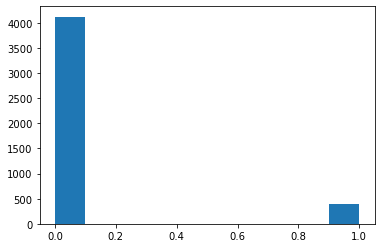

In [46]:
plt.hist(dep_diag)

As you can see our dataset, like most disease diagnosis datasets, is imbalanced. We can employ a number of measures to mitigate consequences of that.

1. **Choose Proper Evaluation Metric:** instead of accuracy we can use F1 score. We should also be using the confusion matrix a lot.
2. **Resampling (Oversampling and Undersampling):** we can oversample the minority class using replacement or undersample the majority class. So we get a balanced dataset and when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes. 
3. **SMOTE:** Synthetic Minority Oversampling Technique, it's oversampling the minority class by synthesizing new records from the existing data.
4. **BalancedBaggingClassifier:** it includes an additional step to balance the training set at the time of fit for a given sampler.
5. **Threshold moving:** we can use ROC Curves and Precision-Recall Curves to find the optimal threshold for the classifier. We can also use a grid search method or search within a set of values to identify the optimal value.
6. **Class weights in the models:** we can specify a higher weight for the minority class using a dictionary.
7. **Treat the problem as anomaly detection**: we can use Isolation forests or autoencoders for example.
8. **Cost-based classification**: redefine our objective function: we don’t target the best accuracy anymore but we look for the lower prediction cost instead.

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28